# BANKING DOMAIN:- FINANCE CREDIT CARD ANALYSIS PROJECT

## MOTIVATION FOR WORK

In today’s digital financial ecosystem, credit card fraud represents a significant and growing threat to both consumers and financial institutions. As global transaction volumes rise, so does the sophistication of fraudulent activity. While banks and payment processors collect vast amounts of transactional data, much of its potential remains untapped when it comes to proactive fraud prevention.

This project is driven by the motivation to leverage data analytics and machine learning to detect fraudulent credit card transactions with greater accuracy and speed. By transforming anonymized transaction data into actionable insights, the goal is to support financial institutions in reducing monetary loss and improving customer trust.

Given the severe class imbalance in fraud detection problems, we incorporate techniques such as data visualization for early pattern recognition and consider approaches like anomaly detection or SMOTE for future work. Through this project, we aim not only to analyze fraud trends but also to lay the groundwork for a scalable, interpretable detection system that enhances real-time decision-making.

Ultimately, this work bridges the gap between raw financial data and intelligent risk management, helping to secure the digital economy.


## Problem Statement:-

The objective of this project is to analyze credit card transaction data and identify patterns that differentiate fraudulent from non-fraudulent transactions. The goal is to gain insights that could potentially enhance the detection and prevention of fraud in real-time systems.


## Objectives:-

### Primary Objective:
- To uncover distinguishing features of fraudulent transactions using data analysis techniques.

### Secondary Objectives:
1. To examine transaction amount and time distribution for fraud cases.
2. To compare statistical patterns of fraud vs. normal transactions.
3. To provide actionable insights for fraud detection strategies.

## Data Collection

In [5]:
# Importing Python Librabries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [7]:
# Collecting data and reading from csv file 

df = pd.read_csv('creditcard.csv')

In [9]:
# Checking top 5 records of the file

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Checking information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Collection Source and Information about the dataset

This dataset was sourced from [Kaggle's Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). It contains 284,807 transactions with 31 features, including anonymized principal components (V1 to V28), the `Amount`, `Time`, and `Class` (target variable: 1 = Fraud, 0 = Normal).

The data spans two days of transactions by European cardholders in September 2013.

In [14]:
# Statistics of the data

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Cleaning


In [18]:
# Checking for null values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
# Checking for duplicates 

df.duplicated().sum()

1081

In [22]:
# Checking data types 

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Data Cleaning

- There are **no missing values** in the dataset.
- **Duplicate rows** were found and removed to ensure clean analysis.
- The `Amount` and `Time` features were kept for analysis, while others are anonymized.

In [26]:
# Removing duplicates from the data

df.drop_duplicates(inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [30]:
# Now, We have 283726 entries instead of 284806 after dropping the duplicates from the data.

In [32]:
# Checking again for duplicated records

df.duplicated().sum()

0

In [34]:
# No duplicated data found now.

# Checking info of the data again.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

## Exploratory Data Analysis (EDA)

In [37]:
# Again describing the data with no duplicates present in the data

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


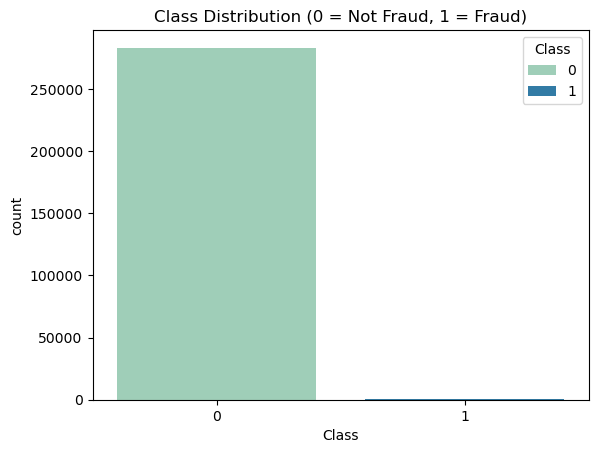

In [39]:
# Distribution of fraud vs non-fraud

sns.countplot(x='Class', data=df, hue= 'Class', palette='YlGnBu')
plt.title('Class Distribution (0 = Not Fraud, 1 = Fraud)')
plt.show()

In [41]:
# In the above graph we barely able to see the graph of the Fraud cases

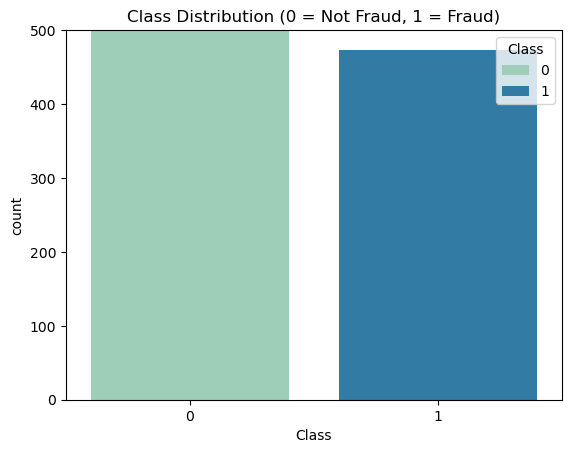

In [43]:
# Now, we are changing the y-axis numbers so that we can easily get the visual for Fraud cases 

sns.countplot(x='Class', data=df, hue= 'Class', palette='YlGnBu')
plt.title('Class Distribution (0 = Not Fraud, 1 = Fraud)')
plt.ylim(0,500)
plt.show()

In [45]:
# Above Graph showcasing the Fraud Cases that mostly closed to 500 counts.

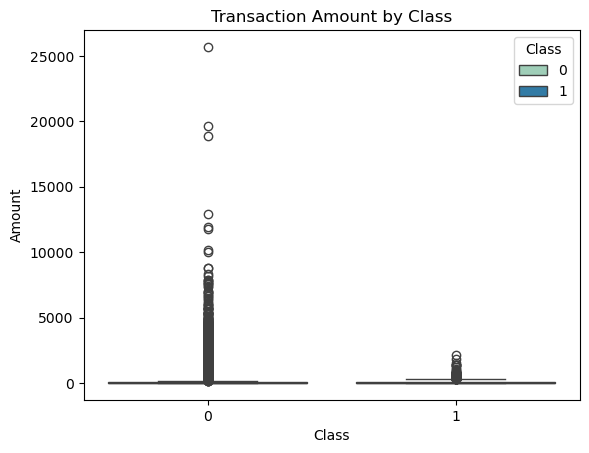

In [47]:
# Amount by class

sns.boxplot(x='Class', y='Amount', data=df, hue= 'Class', palette='YlGnBu')
plt.title('Transaction Amount by Class')
plt.show()


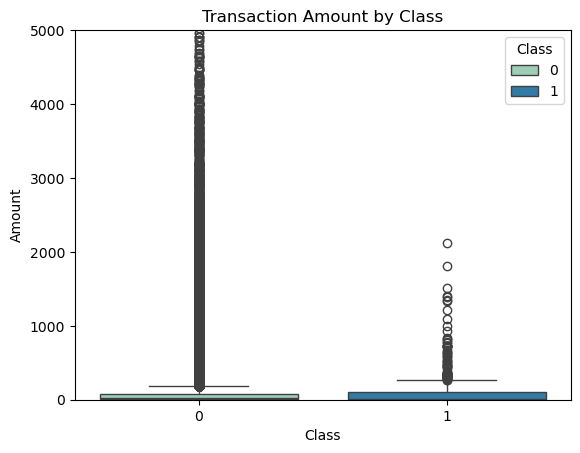

In [49]:
# Now, we are changing the y-axis numbers so that we can easily get the visual for Fraud cases 

sns.boxplot(x='Class', y='Amount', data=df, hue= 'Class', palette='YlGnBu')
plt.title('Transaction Amount by Class')
plt.ylim(0,5000)
plt.show()

# Below Graph will show the Fraud Cases for the transaction amount

In [51]:
# Importing warnings ignore

import warnings
warnings.filterwarnings('ignore')

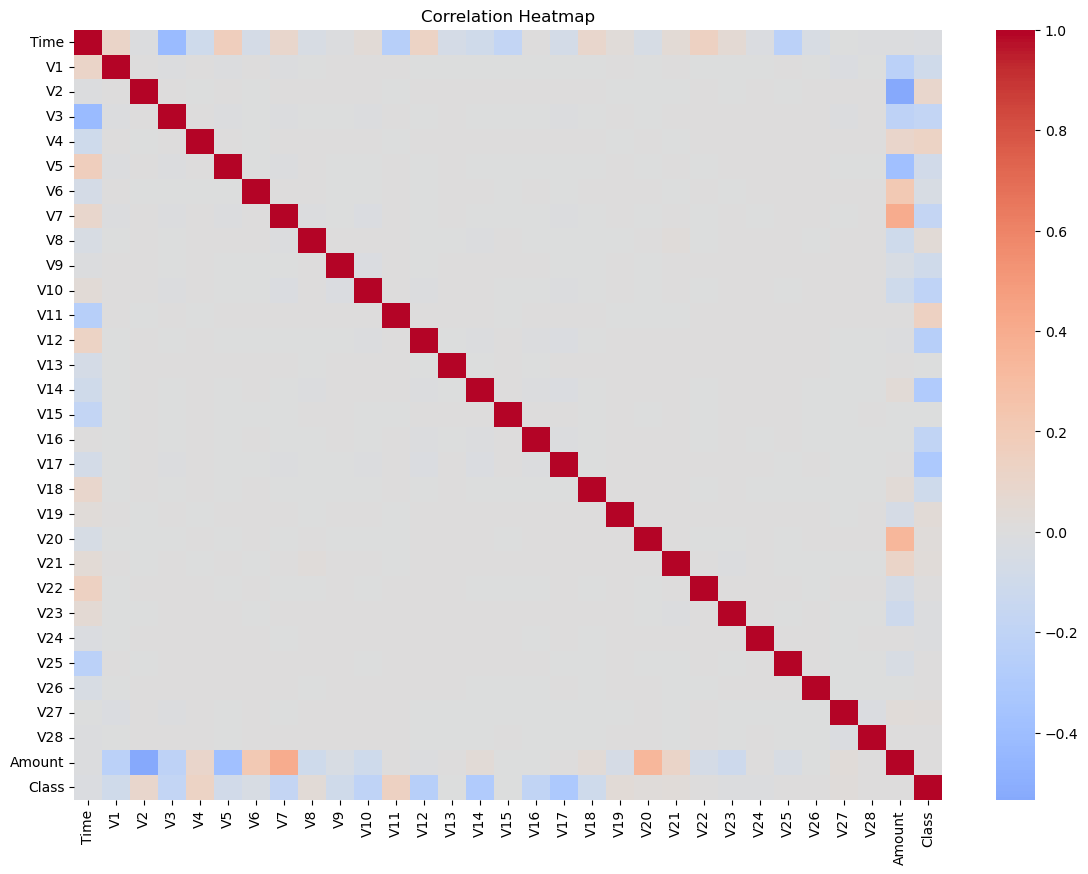

In [53]:
# Correlation matrix

plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


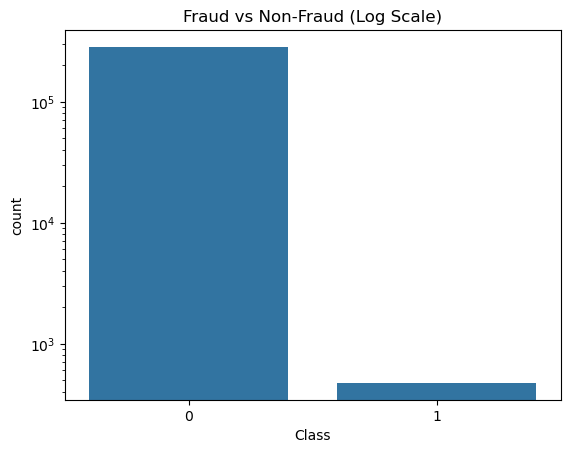

In [55]:
# Class Distribution (Log Scale)

sns.countplot(x='Class', data=df)
plt.yscale('log')
plt.title('Fraud vs Non-Fraud (Log Scale)')
plt.show()

Observation:
- The dataset is highly imbalanced — fraudulent transactions make up **less than 0.2%** of the total.
- This has major implications for modeling and evaluation — traditional accuracy metrics will be misleading.
- Solutions may include using resampling techniques (SMOTE, under-sampling) or anomaly detection models.

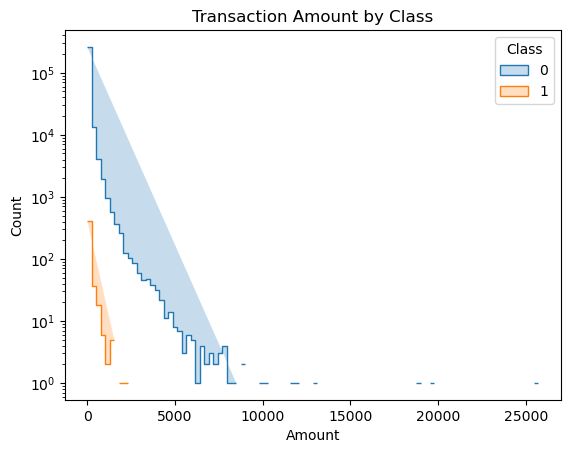

In [58]:
# Transaction Amount Distribution – Fraud vs Non-Fraud

sns.histplot(data=df, x='Amount', hue='Class', log_scale=(False, True), bins=100, element='step')
plt.title('Transaction Amount by Class')
plt.show()


Observation:
- Fraudulent transactions tend to occur in a **lower amount range** compared to non-fraudulent ones.
- However, some high-value frauds exist — so fraud can’t be ruled out by amount alone.
- Financial institutions should monitor both small and high-value suspicious transactions.

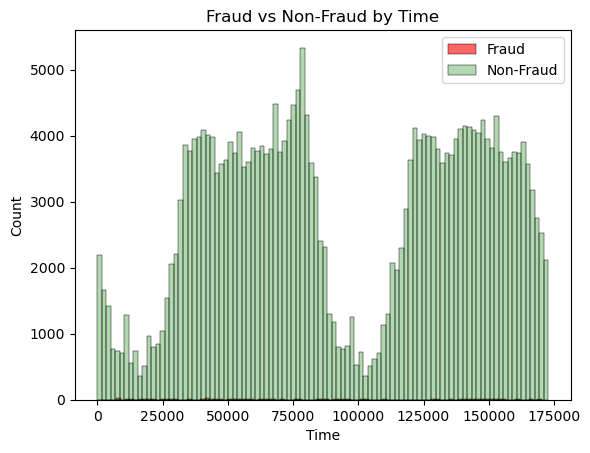

In [62]:
# Time vs Fraud Analysis

sns.histplot(data=df[df['Class'] == 1], x='Time', bins=100, color='red', label='Fraud', alpha=0.6)
sns.histplot(data=df[df['Class'] == 0], x='Time', bins=100, color='green', label='Non-Fraud', alpha=0.3)
plt.legend()
plt.title('Fraud vs Non-Fraud by Time')
plt.show()


Observation:
- Fraudulent activity appears to be **clustered around certain times**, potentially indicating:
  - Automated fraud scripts
  - Manual attacks during off-peak hours
- Time-based behavioral models can be useful in fraud detection.

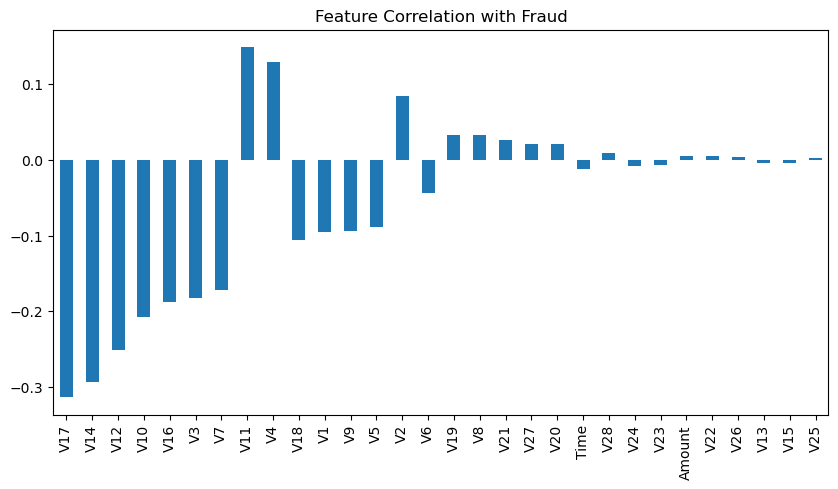

In [65]:
# Correlation with Class

correlation = df.corr()['Class'].drop('Class').sort_values(key=abs, ascending=False)
correlation.plot(kind='bar', figsize=(10, 5), title='Feature Correlation with Fraud')
plt.show()


Observation:
- Features like `V14`, `V12`, and `V10` have the **strongest correlation** (both positive and negative) with fraud.
- These could be important features to focus on for building predictive models.
- Many other features show little correlation individually, but may still be important when combined.

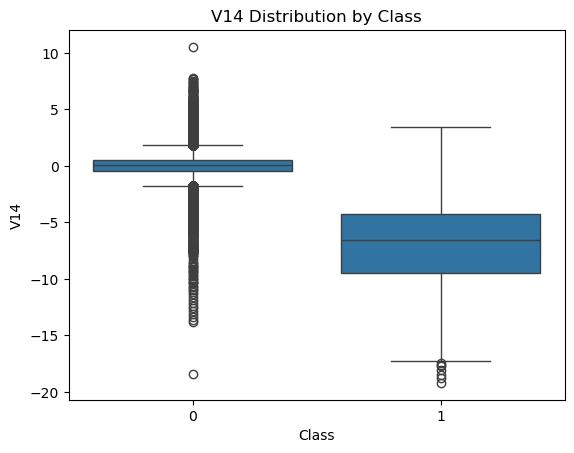

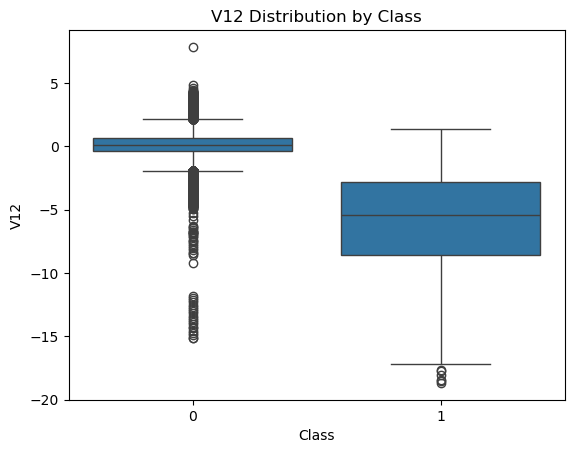

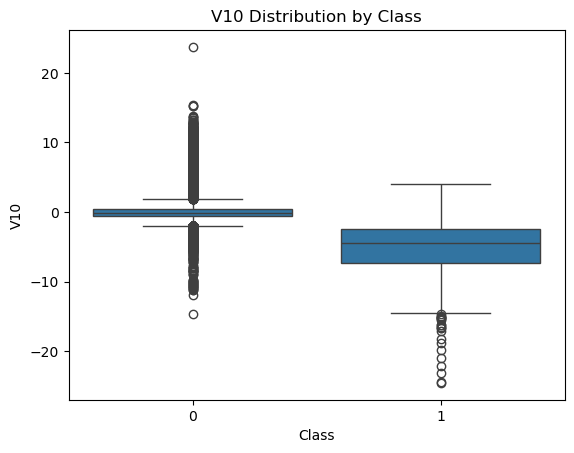

In [68]:
# Boxplots for Key Features

for feature in ['V14', 'V12', 'V10']:
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} Distribution by Class')
    plt.show()


Observation:
- Significant difference in distribution of `V14`, `V12`, and `V10` between fraud and non-fraud.
- Boxplots show that these features can help distinguish fraud clearly.
- These features are strong candidates for training machine learning models.


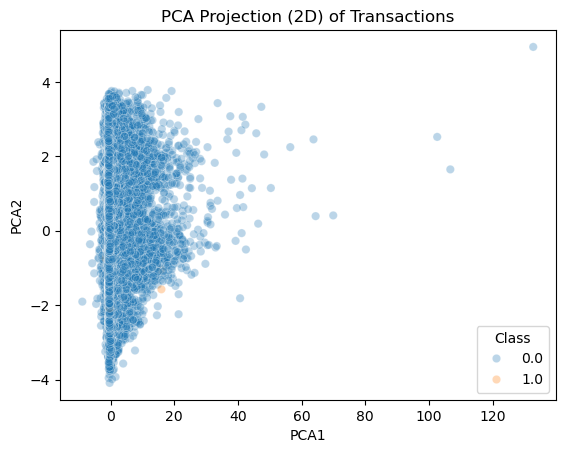

In [71]:
# Principal Component Analysis (PCA) Visualization (2D graph)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df.drop('Class', axis=1))
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca['Class'] = df['Class']

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Class', alpha=0.3)
plt.title('PCA Projection (2D) of Transactions')
plt.show()


Observation:
- PCA projection reveals that **fraudulent transactions cluster separately**, though not perfectly.
- This visual evidence supports using dimensionality reduction or anomaly detection techniques.
- Further separation may be possible with t-SNE or UMAP for modeling or visualization.

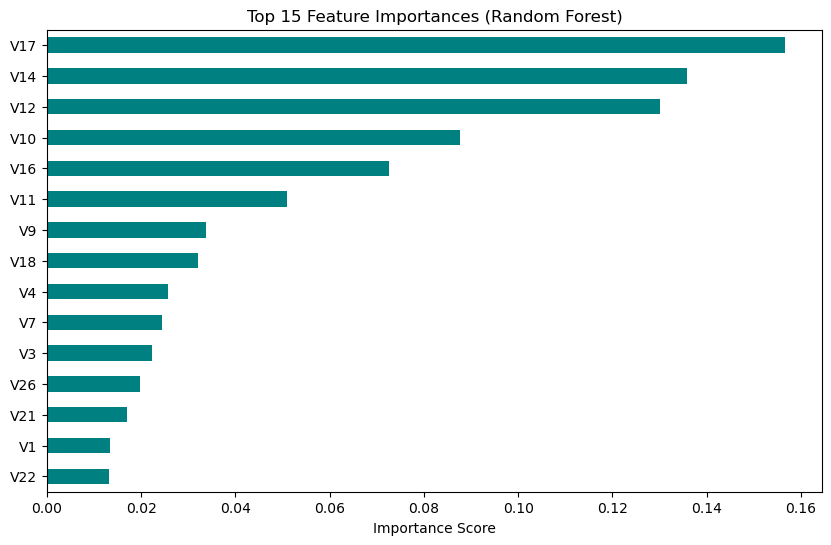

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Preparing the data

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Training the Random Forest

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plot feature importances

importances = model.feature_importances_
feature_names = X.columns


feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:15]


feat_importance.plot(kind='barh', figsize=(10, 6), title='Top 15 Feature Importances (Random Forest)', color='teal')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()


Observation:
The feature importance plot shows which variables contribute most to the model’s ability to predict fraud. In this dataset, anonymized features such as `V14`, `V12`, and `V10` consistently rank highest in importance. These features should be prioritized when tuning or interpreting models. Less impactful features can potentially be removed for efficiency.


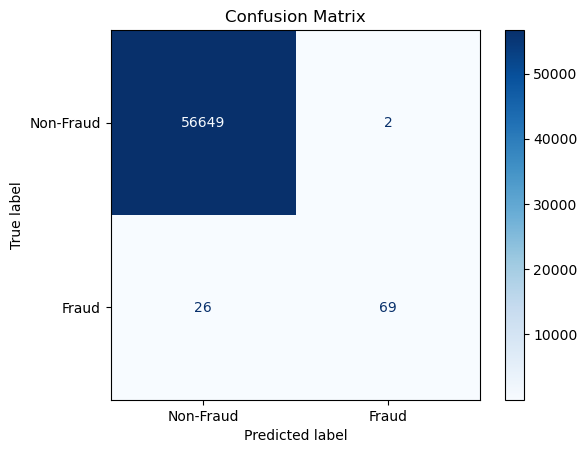

In [77]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict and evaluate
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])

disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Observation:
The confusion matrix provides a visual summary of the model’s classification results. While the model correctly identifies most non-fraud transactions (true negatives), detecting frauds (true positives) remains challenging due to class imbalance. Minimizing false negatives (frauds predicted as non-fraud) is critical in real-world applications.


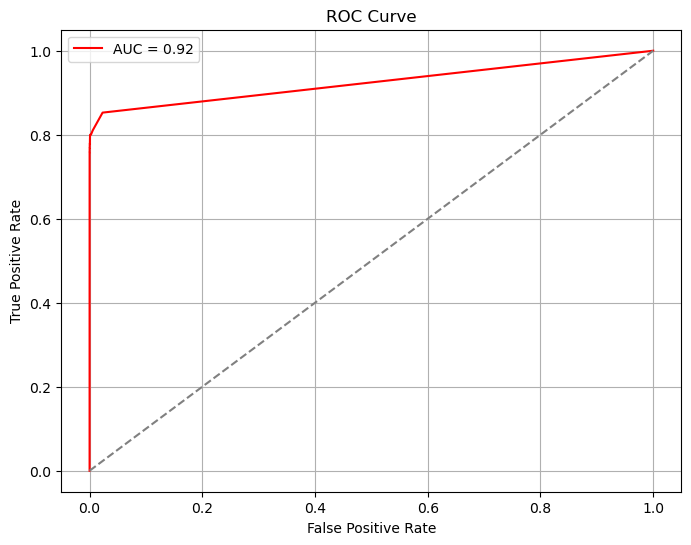

In [80]:
from sklearn.metrics import roc_curve, auc

# Predicting the probabilities

y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the Receiver Operating Characteristic (ROC) Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Observation:
The ROC curve illustrates the trade-off between true positive rate and false positive rate at various thresholds. A curve closer to the top-left corner indicates better performance. The AUC score summarizes this performance — in fraud detection, a high AUC shows the model can effectively distinguish between classes even when frauds are rare.


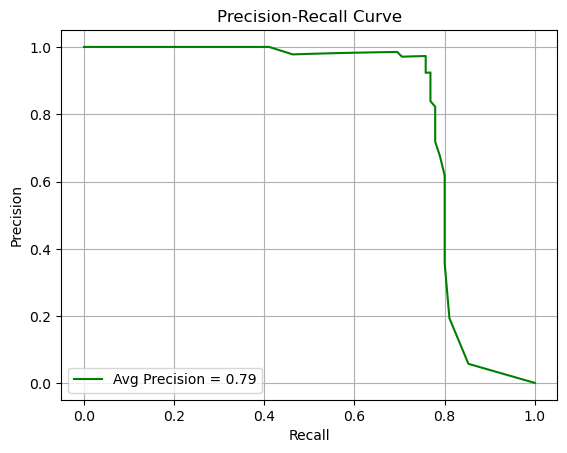

In [83]:
# Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()


Observation:
The precision-recall curve is more informative for imbalanced datasets like this one. It highlights how well the model maintains high precision (few false positives) while improving recall (detecting more frauds). A steep curve and high average precision score suggest the model handles imbalance better than accuracy alone might show.


## Fun Facts & Insights

-  **Global Losses:** According to Nilson Report, global losses due to credit card fraud are projected to exceed **$40 billion annually by 2027**.

-  **Speed Matters:** Most fraudulent transactions occur within **minutes** of a data breach — automated detection is no longer optional, it’s essential.

-  **Human vs Machine:** Trained fraud analysts detect about 70–80% of frauds manually — but models trained on historical data can detect fraud **in milliseconds** with much higher scalability.

-  **Tiny Signals, Huge Impact:** In this dataset, only **0.17%** of transactions are fraudulent — yet those few transactions account for **millions in potential losses**.

-  **Data is Anonymized:** Features like `V1`–`V28` are principal components (PCA), so we don’t know exactly what they represent — we’re detecting patterns in **abstract space**, which makes this project closer to **detective work** than finance!

-  **Cat-and-Mouse Game:** Fraudsters constantly change tactics — so fraud detection models need to **adapt and evolve** just like antivirus software.

